In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
import pandas as pd
from sklearn.datasets import load_iris

#A

In [3]:
# Load the iris dataset
data = load_iris()
# Convert to pandas DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)
# Add the target column
df['target'] = data.target
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
df.groupby('target').size()

target
0    50
1    50
2    50
dtype: int64

In [5]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


Variances of features:
 sepal width (cm)     0.189979
petal width (cm)     0.581006
target               0.671141
sepal length (cm)    0.685694
petal length (cm)    3.116278
dtype: float64
means of features:
 target               1.000000
petal width (cm)     1.199333
sepal width (cm)     3.057333
petal length (cm)    3.758000
sepal length (cm)    5.843333
dtype: float64


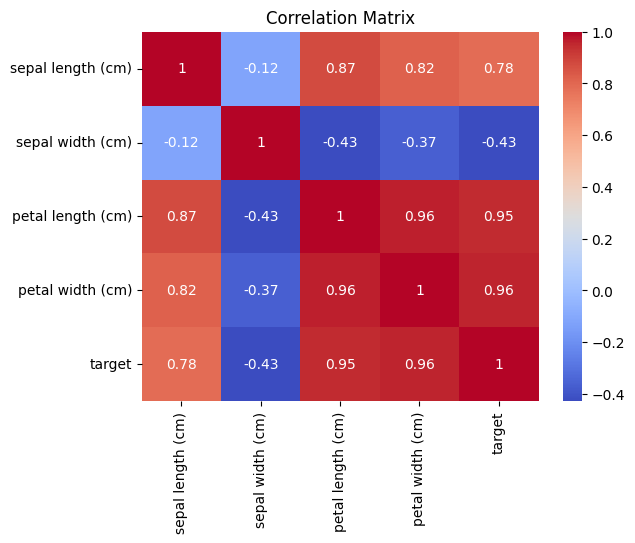

In [6]:
variances = df.var()
variances = variances.sort_values()
print("Variances of features:\n", variances)
means = df.mean()
means = means.sort_values()
print("means of features:\n", means)
# Correlation Matrix
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

(array([0.5]), [Text(0.5, 0, '0')])

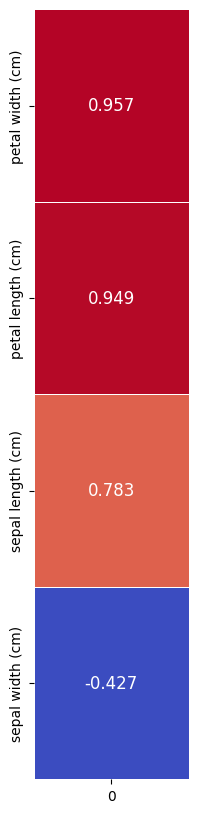

In [7]:
# Select columns to include in correlation matrix
cols = df.columns.tolist()
cols.remove('target')
# Calculate correlation matrix
corr_matrix = df[cols].corrwith(df['target']).sort_values(ascending=False)
# Create heatmap using seaborn
plt.figure(figsize=(2,10))
sns.heatmap(corr_matrix.to_frame(), annot=True, cmap='coolwarm', linewidths=0.5, annot_kws={"size": 12}, fmt='.3f', cbar=False)
# Rotate x-axis tick labels to be horizontal
plt.xticks(rotation=0)

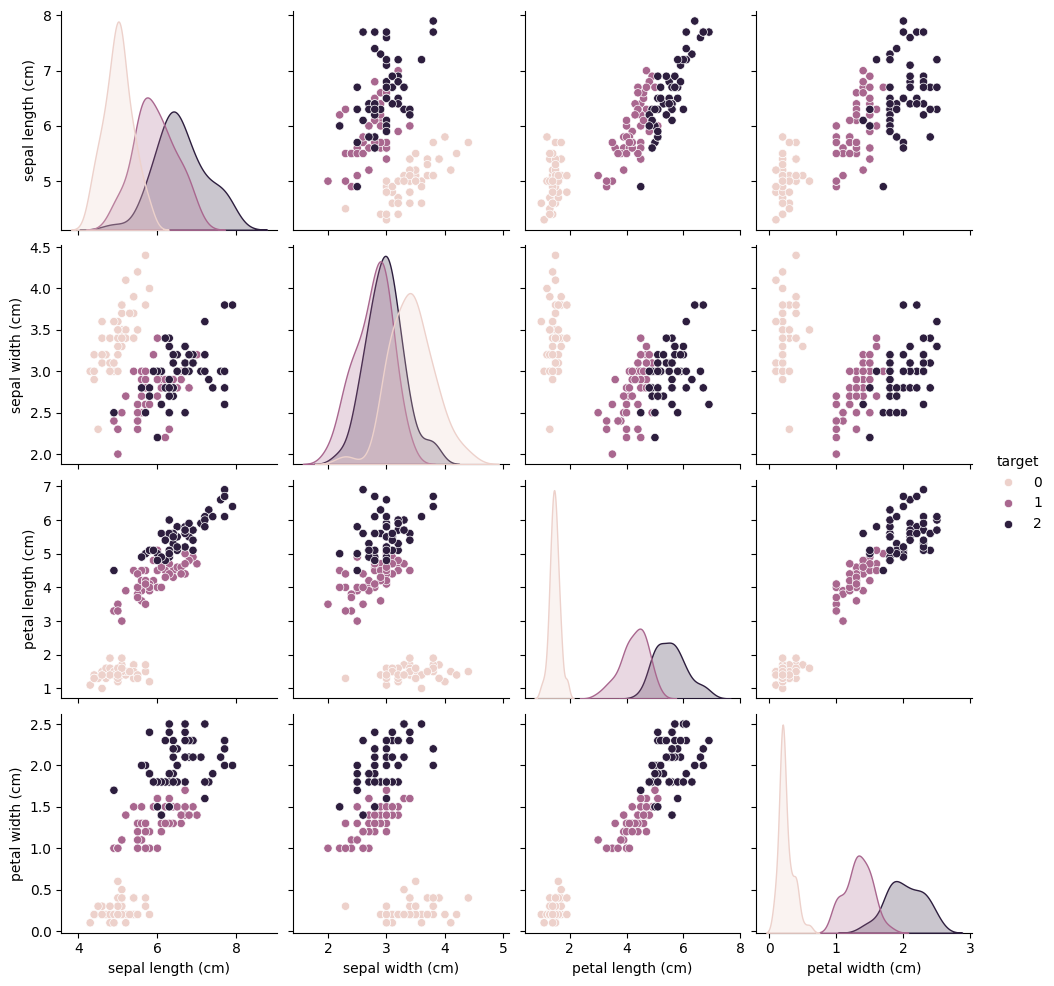

In [ ]:
sns.pairplot(df,hue='target')

In [8]:
from sklearn.model_selection import train_test_split
np.random.seed(64)
array =df.values
np.random.shuffle(array)  # Shuffle the array
shuffled_df = pd.DataFrame(array, columns=df.columns)
X = shuffled_df.drop(columns='target').values
y = shuffled_df['target'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=64)
print('Train:', X_train.shape, y_train.shape, '\nTest:', X_test.shape, y_test.shape)

Train: (120, 4) (120,) 
Test: (30, 4) (30,)


In [9]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

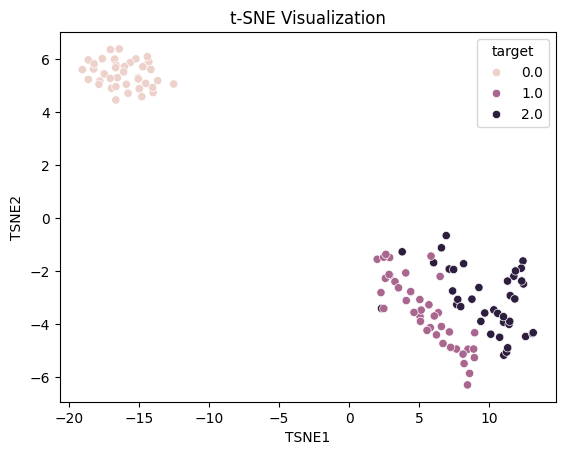

In [10]:
# Apply t-SNE
from sklearn.manifold import TSNE
np.random.seed(64)
tsne = TSNE(n_components=2, random_state=64)
tsne_results = tsne.fit_transform(X_train)
# Create a DataFrame with t-SNE results
tsne_df = pd.DataFrame(tsne_results, columns=['TSNE1', 'TSNE2'])
y_train_df = pd.DataFrame(y_train, columns=['target'])
final_tsne_df = pd.concat([tsne_df, y_train_df], axis=1)
ax=sns.scatterplot(x=final_tsne_df.iloc[:,0], y=final_tsne_df.iloc[:,1],hue='target', data=final_tsne_df, legend=True)
plt.title('t-SNE Visualization')
plt.show()

#B

In [11]:
from sklearn.svm import SVC, LinearSVC

In [12]:
model = SVC(C=1., kernel='linear', probability=True, random_state=64)
model.fit(X_train, y_train)

SVC(kernel='linear', probability=True, random_state=64)

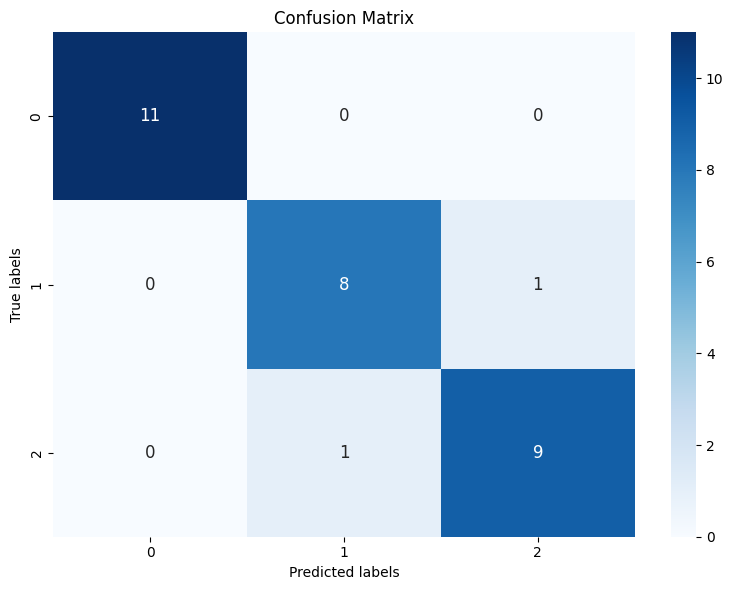

Accuracy : 0.9333333333333333


In [13]:
from sklearn.metrics import confusion_matrix, classification_report
np.random.seed(64)
y_pred = model.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred)
# Plotting confusion matrix as a heatmap with fitted text
plt.figure(figsize=(8, 6))
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 12})
# Get the axis to modify layout
plt.gca().set_ylim(len(np.unique(y_test)), 0)  # Fix for matplotlib 3.1.1 and 3.1.2
plt.title('Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

# Save the plot as PNG
plt.tight_layout()
plt.savefig('confusion_matrix.png', dpi=300)
plt.show()
from sklearn.metrics import accuracy_score
print('Accuracy :',accuracy_score(y_test,y_pred))

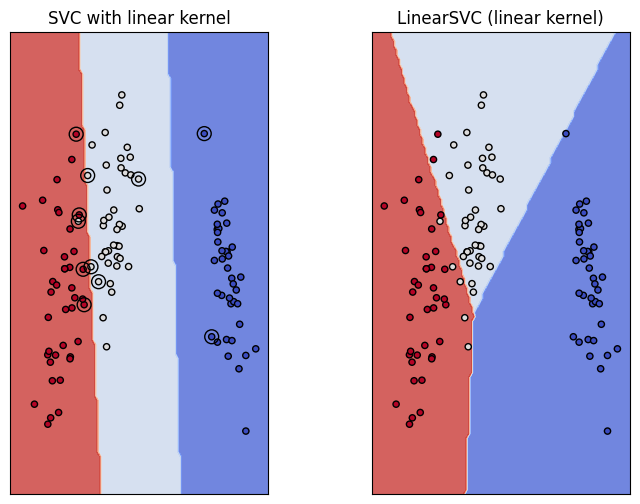

Accuracy : 0.9333333333333333


In [14]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.inspection import DecisionBoundaryDisplay
# Apply LDA to reduce dimensionality to 2
lda = LinearDiscriminantAnalysis(n_components=2)
X= lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)
C = 1.0  # SVM regularization parameter
models = (
    SVC(kernel="linear", C=C),
    LinearSVC(loss='hinge',C=C, max_iter=10000),
)
models = (clf.fit(X, y_train) for clf in models)
# title for the plots
titles = (
    "SVC with linear kernel",
    "LinearSVC (linear kernel)",
)
# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(1, 2, figsize=(8, 6))
plt.subplots_adjust(wspace=0.4, hspace=0.4)
X0, X1 = X[:, 0], X[:, 1]
for clf, title, ax in zip(models, titles, sub.flatten()):
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        response_method="predict",
        cmap=plt.cm.coolwarm,
        alpha=0.8,
        ax=ax,

    )
    ax.scatter(X0, X1, c=y_train, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)
# Plot support vectors for SVC
    if isinstance(clf, SVC):
        sv = clf.support_vectors_
        ax.scatter(sv[:, 0], sv[:, 1], s=100, linewidth=1, facecolors='none', edgecolors='k')
# Plot support vectors
plt.show()
y_pred = model.predict(X_test)

print('Accuracy :',accuracy_score(y_test,y_pred))

In [15]:
param_grid = {'C': [0.1, 1, 10, 100, 1000], 'kernel': ['linear']}
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=3)
grid.fit(X, y_train)



Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5] END ..............C=0.1, kernel=linear;, score=1.000 total time=   0.0s
[CV 2/5] END ..............C=0.1, kernel=linear;, score=0.958 total time=   0.0s
[CV 3/5] END ..............C=0.1, kernel=linear;, score=1.000 total time=   0.0s
[CV 4/5] END ..............C=0.1, kernel=linear;, score=1.000 total time=   0.0s
[CV 5/5] END ..............C=0.1, kernel=linear;, score=1.000 total time=   0.0s
[CV 1/5] END ................C=1, kernel=linear;, score=1.000 total time=   0.0s
[CV 2/5] END ................C=1, kernel=linear;, score=0.958 total time=   0.0s
[CV 3/5] END ................C=1, kernel=linear;, score=1.000 total time=   0.0s
[CV 4/5] END ................C=1, kernel=linear;, score=1.000 total time=   0.0s
[CV 5/5] END ................C=1, kernel=linear;, score=1.000 total time=   0.0s
[CV 1/5] END ...............C=10, kernel=linear;, score=1.000 total time=   0.0s
[CV 2/5] END ...............C=10, kernel=linear;,

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000], 'kernel': ['linear']},
             verbose=3)

In [16]:
grid.best_params_

{'C': 0.1, 'kernel': 'linear'}

In [17]:
grid.best_estimator_

SVC(C=0.1, kernel='linear')

In [18]:
grid_predictions = grid.predict(X_test_lda)
print(confusion_matrix(y_test,grid_predictions))

[[11  0  0]
 [ 0  8  1]
 [ 0  0 10]]


In [19]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        11
         1.0       1.00      0.89      0.94         9
         2.0       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30



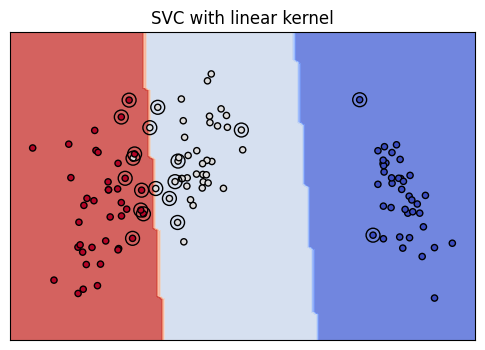

Accuracy : 0.9666666666666667


In [20]:
C = 0.1  # SVM regularization parameter
models = [
    SVC(kernel="linear", C=C)
]

# Train and fit models
for clf in models:
    clf.fit(X, y_train)

# Title for the plots
titles = (
    "SVC with linear kernel",
)

# Set-up 1x1 grid for plotting since you have only one model
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
disp = DecisionBoundaryDisplay.from_estimator(
    models[0],  # Only one model in the list
    X,
    response_method="predict",
    cmap=plt.cm.coolwarm,
    alpha=0.8,
    ax=ax,
)

ax.scatter(X[:, 0], X[:, 1], c=y_train, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(titles[0])

# Plot support vectors for SVC
if isinstance(models[0], SVC):
    sv = models[0].support_vectors_
    ax.scatter(sv[:, 0], sv[:, 1], s=100, linewidth=1, facecolors='none', edgecolors='k')

plt.show()

# Make predictions on the test set
y_pred = models[0].predict(X_test_lda)

print('Accuracy :', accuracy_score(y_test, y_pred))


In [21]:
models[0].coef_, models[0].intercept_

(array([[0.37613279, 0.0520722 ],
        [0.19979248, 0.03650102],
        [0.83932381, 0.10527038]]),
 array([-1.24376165, -0.21011551,  2.892334  ]))

In [22]:
models[0].support_, models[0].n_support_, models[0].support_vectors_

(array([ 61, 101,  17,  21,  28,  34,  42,  58,  80, 106, 119,  32,  45,
         48,  53,  54,  78,  85, 116], dtype=int32),
 array([2, 9, 8], dtype=int32),
 array([[ 5.67884286,  2.06948399],
        [ 6.26849989, -1.15912713],
        [-2.33073746,  0.6070995 ],
        [-3.31382563, -0.04688631],
        [-4.31600887,  0.67571794],
        [-3.22557147,  1.88911004],
        [-2.71123322, -0.28423388],
        [-2.35109681, -0.85663356],
        [-3.5754155 ,  1.40348149],
        [-2.46218393,  0.11653676],
        [ 0.46156583,  1.34719894],
        [-3.85721147, -0.65006807],
        [-4.48847511,  2.06000321],
        [-4.83322095,  1.65761409],
        [-3.93758964, -0.08687014],
        [-4.66218718,  0.19711797],
        [-4.33704566, -1.23495039],
        [-4.24735904,  0.77725681],
        [-3.97481429, -0.56027599]]))

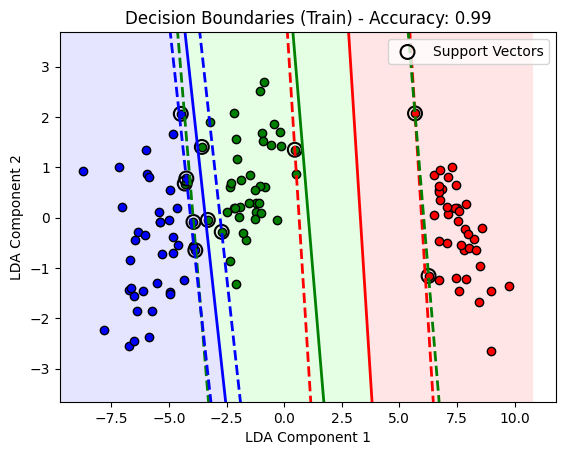

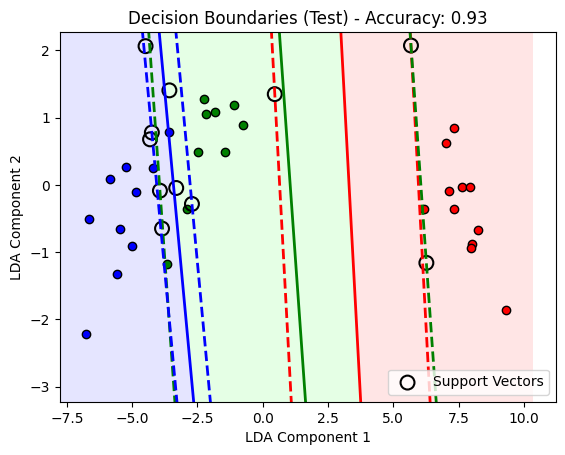

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap
def plot_decision_boundaries(X, y, model, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Define custom colormap in background
    colors = ['#FFAAAA', '#AAFFAA', '#AAAAFF']
    cmap_background = ListedColormap(colors)
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_background)
    # Define scatter plot colors
    scatter_colors = ['r', 'g', 'b']
    for i, color in zip(range(3), scatter_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, edgecolors='k')
        w = model.coef_[i]
        b = model.intercept_[i]
        x0 = np.linspace(x_min, x_max, 200)
        decision_boundary = (-(w[0] / w[1]) * x0) - (b / w[1])
        margin = 1 / w[1]
        gutter_up = decision_boundary + margin
        gutter_down = decision_boundary - margin
        plt.plot(x0, decision_boundary, '-', c=scatter_colors[i], linewidth=2)
        plt.plot(x0, gutter_up, '--', c=scatter_colors[i], linewidth=2)
        plt.plot(x0, gutter_down, '--', c=scatter_colors[i], linewidth=2)
    sv = model.support_vectors_
    plt.scatter(sv[:, 0], sv[:, 1], facecolors='none', edgecolors='k', s=100, linewidths=1.5, label='Support Vectors')
    y_pred = model.predict(X)
    accuracy = accuracy_score(y, y_pred)
    plt.ylim([y_min, y_max])
    plt.title(f'{title} - Accuracy: {accuracy:.2f}')
    plt.xlabel('LDA Component 1')
    plt.ylabel('LDA Component 2')
    plt.legend(loc='best')
    plt.show()
# Apply LDA to reduce dimensionality to 2
lda = LinearDiscriminantAnalysis(n_components=2)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)
model = SVC(C=1., kernel='linear', probability=True)
model.fit(X_train_lda, y_train)
# Plot decision boundaries for the training set
plot_decision_boundaries(X_train_lda, y_train, model, "Decision Boundaries (Train)")
# Plot decision boundaries for the test set
plot_decision_boundaries(X_test_lda, y_test, model, "Decision Boundaries (Test)")


#C

In [24]:
param_grid = {'C': [0.1, 1, 10, 100, 1000], 'kernel': ['poly'],'coef0': [0.1, 1, 2, 5, 1]}
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=3)
grid.fit(X, y_train)
grid.best_params_

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .....C=0.1, coef0=0.1, kernel=poly;, score=1.000 total time=   0.0s
[CV 2/5] END .....C=0.1, coef0=0.1, kernel=poly;, score=0.917 total time=   0.0s
[CV 3/5] END .....C=0.1, coef0=0.1, kernel=poly;, score=0.875 total time=   0.0s
[CV 4/5] END .....C=0.1, coef0=0.1, kernel=poly;, score=0.917 total time=   0.0s
[CV 5/5] END .....C=0.1, coef0=0.1, kernel=poly;, score=0.875 total time=   0.0s
[CV 1/5] END .......C=0.1, coef0=1, kernel=poly;, score=1.000 total time=   0.0s
[CV 2/5] END .......C=0.1, coef0=1, kernel=poly;, score=0.917 total time=   0.0s
[CV 3/5] END .......C=0.1, coef0=1, kernel=poly;, score=1.000 total time=   0.0s
[CV 4/5] END .......C=0.1, coef0=1, kernel=poly;, score=1.000 total time=   0.0s
[CV 5/5] END .......C=0.1, coef0=1, kernel=poly;, score=1.000 total time=   0.0s
[CV 1/5] END .......C=0.1, coef0=2, kernel=poly;, score=1.000 total time=   0.0s
[CV 2/5] END .......C=0.1, coef0=2, kernel=poly

{'C': 0.1, 'coef0': 2, 'kernel': 'poly'}

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.inspection import DecisionBoundaryDisplay
import imageio
from sklearn.model_selection import train_test_split
np.random.seed(64)
array =df.values
np.random.shuffle(array)  # Shuffle the array
shuffled_df = pd.DataFrame(array, columns=df.columns)
X = shuffled_df.drop(columns='target').values
y = shuffled_df['target'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=64)
# Standardize features
scaler=StandardScaler()
scaler.fit(X_train)
X_train_scaled  = scaler.transform(X_train)
X_test_scaled= scaler.transform(X_test)

In [26]:
# Polynomial degrees to evaluate
degrees = range(1, 11)
# Train SVM models with polynomial kernels
models = []
for degree in degrees:
    model = SVC(C=0.1, kernel='poly', degree=degree,coef0=2, random_state=64)
    model.fit(X_train_scaled, y_train)
    models.append(model)

# Evaluate and compare models
train_accuracies = []
test_accuracies = []
train_f1s = []
test_f1s = []
for model in models:
    train_pred = model.predict(X_train_scaled)
    test_pred = model.predict(X_test_scaled)

    train_acc = accuracy_score(y_train, train_pred)
    test_acc = accuracy_score(y_test, test_pred)

    train_f1 = f1_score(y_train, train_pred, average='weighted')
    test_f1 = f1_score(y_test, test_pred, average='weighted')

    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)
    train_f1s.append(train_f1)
    test_f1s.append(test_f1)

# Print results
for degree, train_acc, test_acc, train_f1, test_f1 in zip(degrees, train_accuracies, test_accuracies, train_f1s, test_f1s):
    print(f"Degree {degree}: Train Accuracy = {train_acc:.3f}, Test Accuracy = {test_acc:.3f}, Train F1 = {train_f1:.3f}, Test F1 = {test_f1:.3f}")


Degree 1: Train Accuracy = 0.950, Test Accuracy = 0.933, Train F1 = 0.950, Test F1 = 0.933
Degree 2: Train Accuracy = 0.950, Test Accuracy = 0.967, Train F1 = 0.950, Test F1 = 0.967
Degree 3: Train Accuracy = 0.992, Test Accuracy = 0.967, Train F1 = 0.992, Test F1 = 0.967
Degree 4: Train Accuracy = 0.992, Test Accuracy = 0.967, Train F1 = 0.992, Test F1 = 0.967
Degree 5: Train Accuracy = 0.983, Test Accuracy = 0.933, Train F1 = 0.983, Test F1 = 0.933
Degree 6: Train Accuracy = 0.992, Test Accuracy = 0.933, Train F1 = 0.992, Test F1 = 0.933
Degree 7: Train Accuracy = 0.992, Test Accuracy = 0.933, Train F1 = 0.992, Test F1 = 0.933
Degree 8: Train Accuracy = 1.000, Test Accuracy = 0.933, Train F1 = 1.000, Test F1 = 0.933
Degree 9: Train Accuracy = 1.000, Test Accuracy = 0.933, Train F1 = 1.000, Test F1 = 0.933
Degree 10: Train Accuracy = 1.000, Test Accuracy = 0.933, Train F1 = 1.000, Test F1 = 0.933


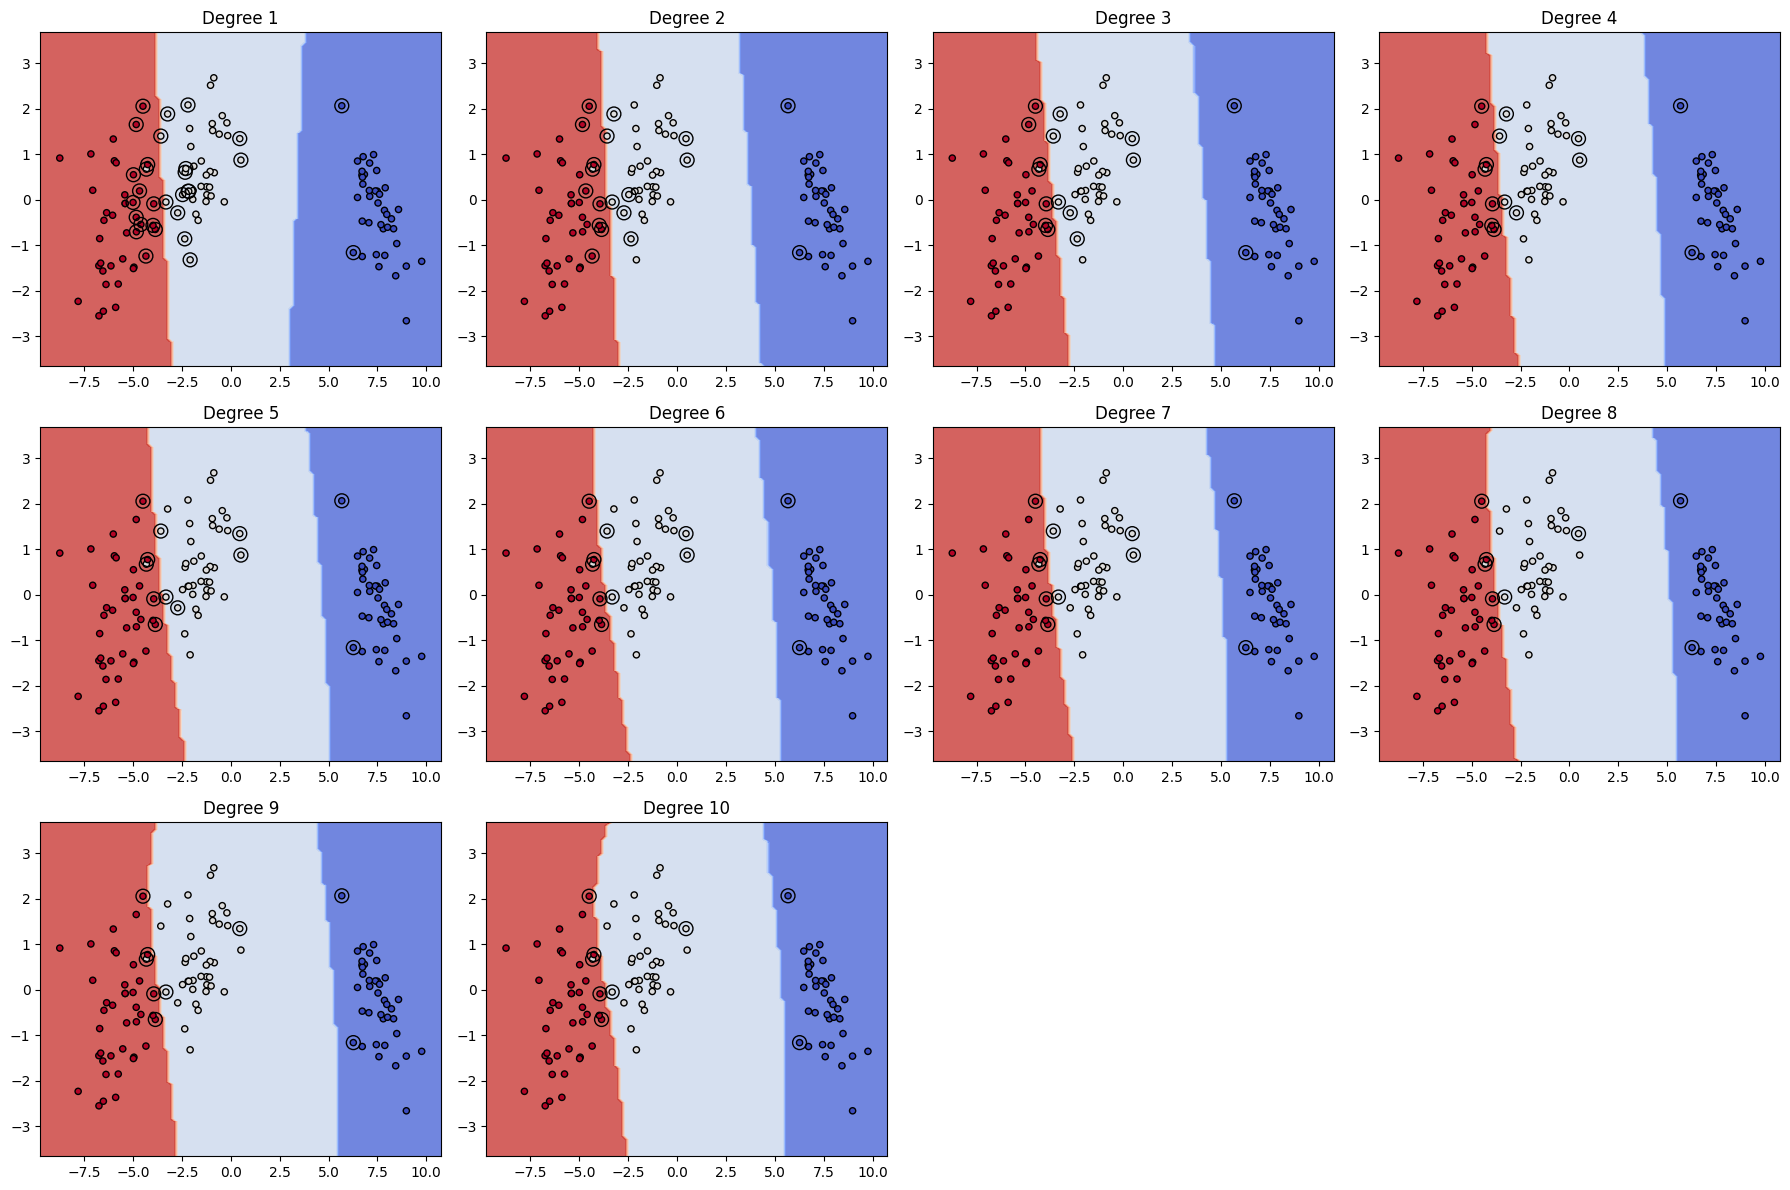

In [27]:
# Apply LDA for dimensionality reduction to 2 components
lda = LinearDiscriminantAnalysis(n_components=2)
X_train_lda = lda.fit_transform(X_train_scaled, y_train)
X_test_lda = lda.transform(X_test_scaled)
degrees = range(1, 11)
# Train SVM models with polynomial kernels
models = []
for degree in degrees:
    model = SVC(C=1, kernel='poly', degree=degree,coef0=1, random_state=64)
    model.fit(X_train_lda, y_train)
    models.append(model)
plt.figure(figsize=(18, 12))
for i, model in enumerate(models):
    plt.subplot(3, 4, i + 1)
    disp = DecisionBoundaryDisplay.from_estimator(
        model,
        X_train_lda,
        response_method="predict",
        cmap=plt.cm.coolwarm,
        alpha=0.8,
        ax=plt.gca()
    )
    plt.scatter(X_train_lda[:, 0], X_train_lda[:, 1], c=y_train, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
    plt.title(f"Degree {i + 1}")
    # Plot support vectors for SVC
    if hasattr(model, 'support_vectors_'):
        sv = model.support_vectors_
        plt.scatter(sv[:, 0], sv[:, 1], s=100, linewidth=1, facecolors='none', edgecolors='k')
plt.tight_layout()
plt.show()

In [28]:
images = []
for degree, model in zip(degrees, models):
    plt.figure(figsize=(6, 4))
    disp = DecisionBoundaryDisplay.from_estimator(model, X_train_lda, response_method="predict", cmap=plt.cm.coolwarm, alpha=0.8)
    disp.ax_.scatter(X_train_lda[:, 0], X_train_lda[:, 1], c=y_train, edgecolor="k")
    plt.title(f"Degree {degree}")
    plt.tight_layout()
    # Save each plot as an image
    filename = f'degree_{degree}.png'
    plt.savefig(filename)
    images.append(imageio.imread(filename))
    plt.close()
# Save images as a GIF
gif_filename = 'q1-c-gif.gif'
imageio.mimsave(gif_filename, images, duration=1)

print(f"GIF created: {gif_filename}")

<ipython-input-28-049b1452d179>:11: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))
<ipython-input-28-049b1452d179>:11: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))
<ipython-input-28-049b1452d179>:11: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))
<ipython-input-28-0

GIF created: q1-c-gif.gif


<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

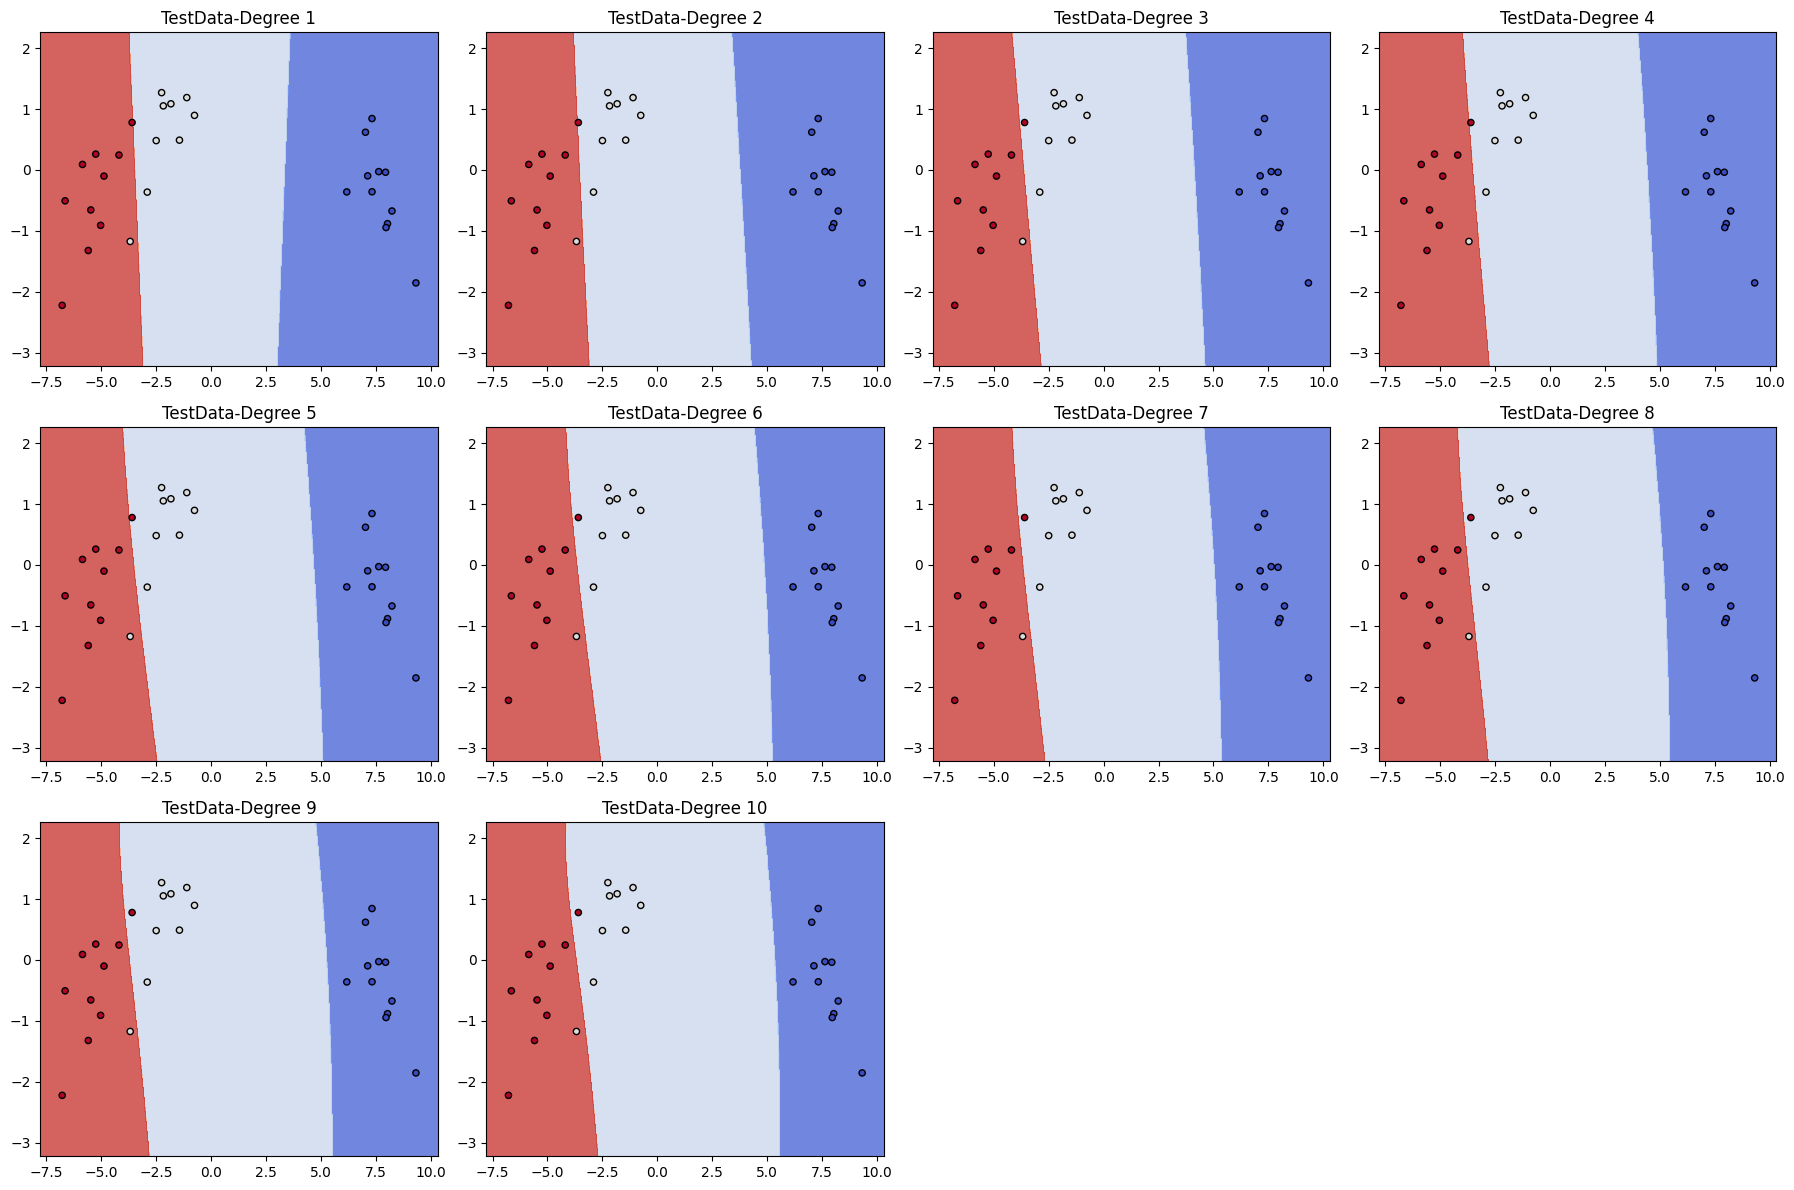

In [31]:
# Plot decision boundaries for each model in test data
plt.figure(figsize=(18, 12))
x_min, x_max = X_test_lda[:, 0].min() - 1, X_test_lda[:, 0].max() + 1
y_min, y_max = X_test_lda[:, 1].min() - 1, X_test_lda[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

for i, model in enumerate(models):
    plt.subplot(3, 4, i + 1)
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X_test_lda[:, 0], X_test_lda[:, 1], c=y_test, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
    plt.title(f"TestData-Degree {i + 1}")

plt.tight_layout()
plt.show()


In [32]:
images = []
for degree, model in zip(degrees, models):
    plt.figure(figsize=(6, 4))
    disp = DecisionBoundaryDisplay.from_estimator(model, X_test_lda, response_method="predict", cmap=plt.cm.coolwarm, alpha=0.8)
    disp.ax_.scatter(X_test_lda[:, 0], X_test_lda[:, 1], c=y_test, edgecolor="k")
    plt.title(f"Degree {degree}")
    plt.tight_layout()
    # Save each plot as an image
    filename = f'test_degree_{degree}.png'
    plt.savefig(filename)
    images.append(imageio.imread(filename))
    plt.close()
# Save images as a GIF
gif_filename = 'q1-c-test-gif.gif'
imageio.mimsave(gif_filename, images, duration=1)

print(f"GIF created: {gif_filename}")

<ipython-input-32-132a5fd5f1b3>:11: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))
<ipython-input-32-132a5fd5f1b3>:11: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))
<ipython-input-32-132a5fd5f1b3>:11: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))
<ipython-input-32-1

GIF created: q1-c-test-gif.gif


<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

#D

Degree 1: Accuracy = 0.7333, F1 Score = 0.7156
Degree 2: Accuracy = 1.0000, F1 Score = 1.0000
Degree 3: Accuracy = 1.0000, F1 Score = 1.0000
Degree 4: Accuracy = 1.0000, F1 Score = 1.0000
Degree 5: Accuracy = 1.0000, F1 Score = 1.0000
Degree 6: Accuracy = 1.0000, F1 Score = 1.0000
Degree 7: Accuracy = 1.0000, F1 Score = 1.0000
Degree 8: Accuracy = 0.4667, F1 Score = 0.4619
Degree 9: Accuracy = 0.3000, F1 Score = 0.2957
Degree 10: Accuracy = 0.5333, F1 Score = 0.4620


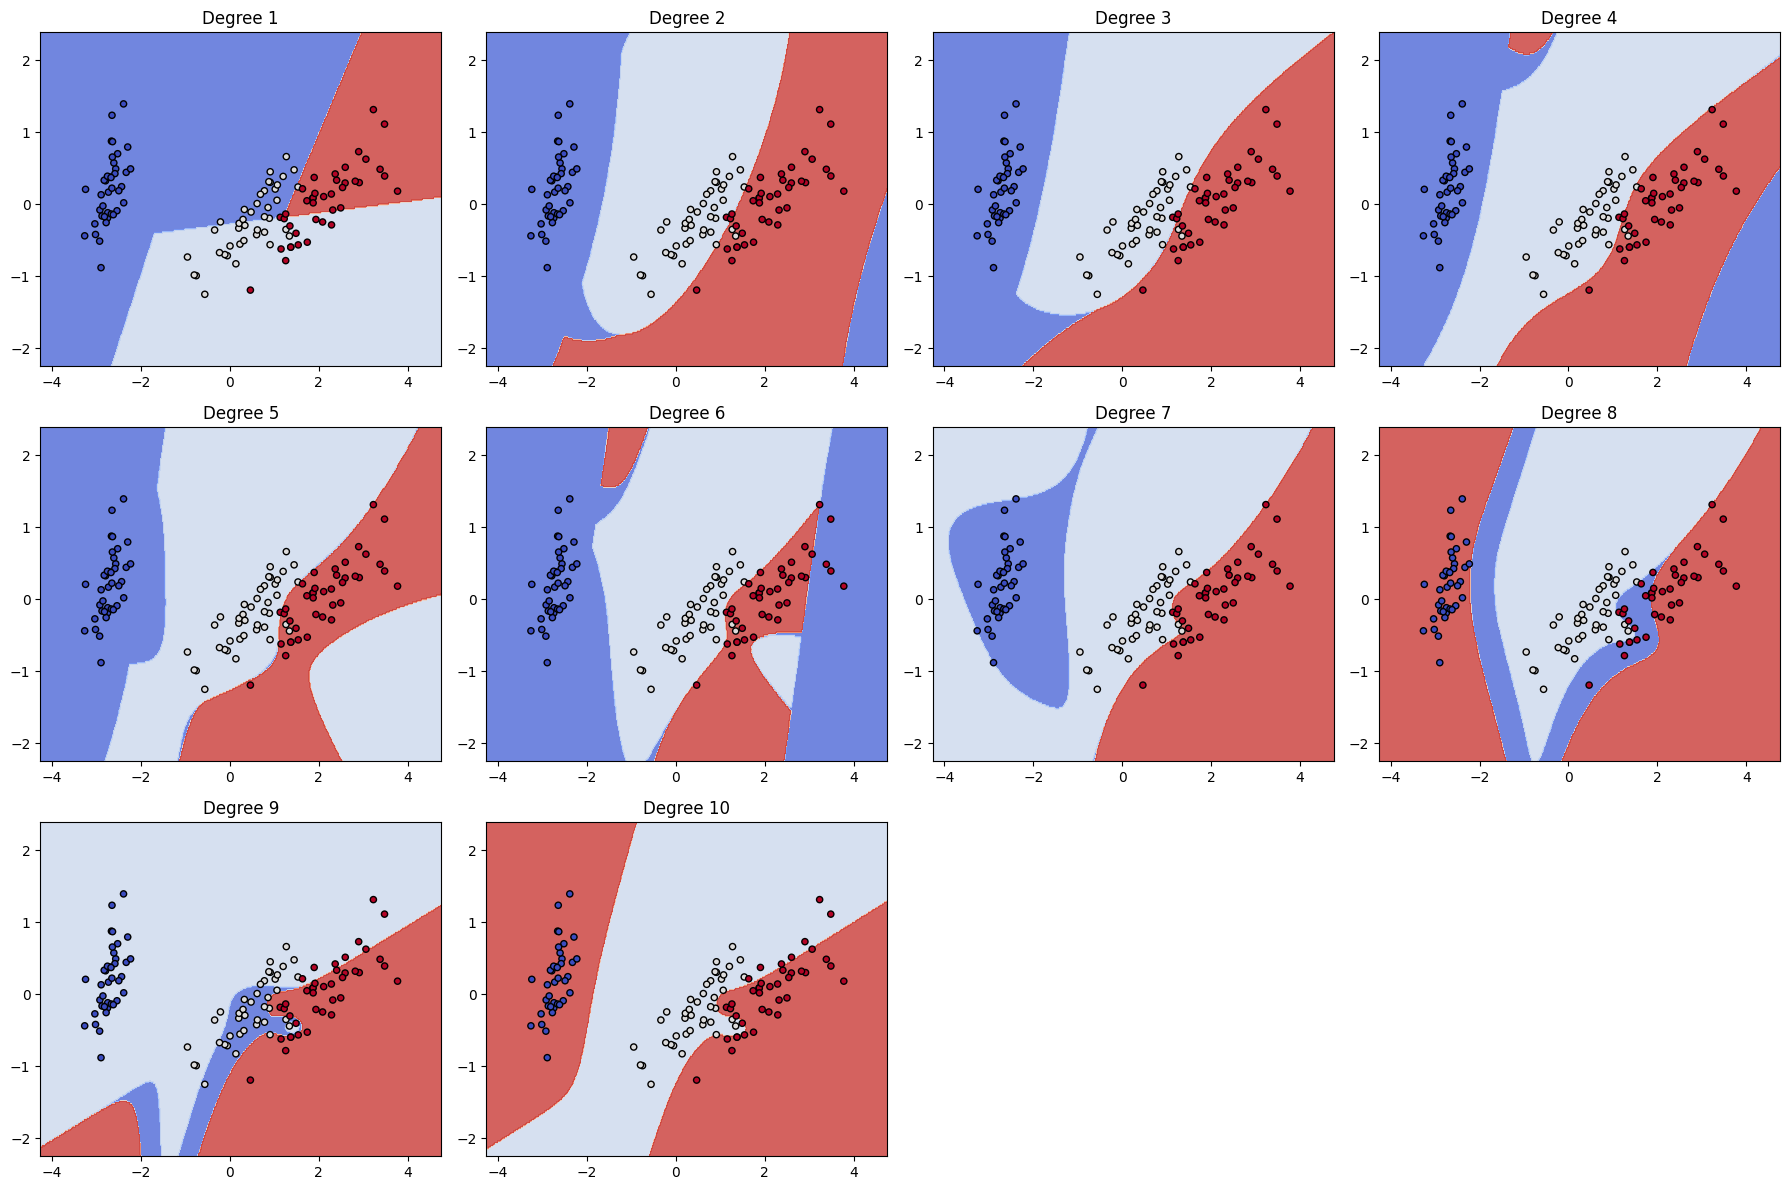

In [34]:
import numpy as np
import cvxopt
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score

class SVM:
    def __init__(self, C=1.0):
        self.C = C
        self.w = None
        self.b = 0
        self.a = None
        self.sv_x = None
        self.sv_y = None

    @staticmethod
    def polynomial_kernel(X, Y, r=2, degree=3):
        return (r + np.dot(X, Y.T)) ** degree

    def fit(self, X, y, kernel_type='polynomial_kernel', poly_params=(1, 3)):
        n_samples, n_features = X.shape

        # Compute the Gram matrix
        if kernel_type == 'polynomial_kernel':
            K = self.polynomial_kernel(X, X, poly_params[0], poly_params[1])
        else:
            raise ValueError("Invalid kernel type")

        # Construct P, q, A, b, G, h matrices for CVXOPT
        P = cvxopt.matrix(np.outer(y, y) * K)
        q = cvxopt.matrix(np.ones(n_samples) * -1)
        A = cvxopt.matrix(y, (1, n_samples), 'd')
        b = cvxopt.matrix(0.0)
        G = cvxopt.matrix(np.vstack((np.diag(np.ones(n_samples) * -1), np.identity(n_samples))))
        h = cvxopt.matrix(np.hstack((np.zeros(n_samples), np.ones(n_samples) * self.C)))

        # Solve QP problem
        cvxopt.solvers.options['show_progress'] = False
        solution = cvxopt.solvers.qp(P, q, G, h, A, b)

        # Lagrange multipliers
        self.a = np.ravel(solution['x'])

        # Support vectors have non-zero Lagrange multipliers
        sv = self.a > 1e-5
        self.a = self.a[sv]
        self.sv_x = X[sv]
        self.sv_y = y[sv]

        # Bias
        if len(self.a) > 0:
            K_sv = K[sv][:, sv]
            self.b = np.mean(self.sv_y - np.dot((self.a * self.sv_y), K_sv))
        else:
            self.b = 0

        self.w = None  # Not used for non-linear kernels

    def predict(self, X_t, kernel_type='polynomial_kernel', poly_params=(1, 3)):
        if kernel_type == 'polynomial_kernel':
            K = self.polynomial_kernel(X_t, self.sv_x, poly_params[0], poly_params[1])
        else:
            raise ValueError("Invalid kernel type")

        y_predict = np.dot(K, self.a * self.sv_y) + self.b
        return np.sign(y_predict)

# One-vs-Rest strategy for multi-class classification
class OvR_SVM:
    def __init__(self, C=1.0):
        self.C = C
        self.models = []

    def fit(self, X, y, kernel_type='polynomial_kernel', poly_params=(1, 3)):
        self.classes = np.unique(y)
        for cls in self.classes:
            y_binary = np.where(y == cls, 1, -1)
            model = SVM(C=self.C)
            model.fit(X, y_binary, kernel_type=kernel_type, poly_params=poly_params)
            self.models.append(model)

    def predict(self, X, kernel_type='polynomial_kernel', poly_params=(1, 3)):
        predictions = np.zeros((X.shape[0], len(self.classes)))
        for i, model in enumerate(self.models):
            predictions[:, i] = model.predict(X, kernel_type=kernel_type, poly_params=poly_params)
        return self.classes[np.argmax(predictions, axis=1)]

# Apply PCA for dimensionality reduction to 2 components
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Polynomial degrees to evaluate
degrees = range(1, 11)

models = []
accuracies = []
f1_scores = []

for degree in degrees:
    model = OvR_SVM(C=1)
    model.fit(X_train_pca, y_train, kernel_type='polynomial_kernel', poly_params=(1, degree))
    y_pred = model.predict(X_test_pca, kernel_type='polynomial_kernel', poly_params=(1, degree))
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='macro')
    accuracies.append(accuracy)
    f1_scores.append(f1)
    models.append(model)

    print(f'Degree {degree}: Accuracy = {accuracy:.4f}, F1 Score = {f1:.4f}')

plt.figure(figsize=(18, 12))
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

for i, model in enumerate(models):
    plt.subplot(3, 4, i + 1)
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()], kernel_type='polynomial_kernel', poly_params=(1, degrees[i]))
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
    plt.title(f"Degree {i + 1}")
# Plot support vectors for SVC
    if hasattr(model, 'support_vectors_'):
        sv = model.support_vectors_
        plt.scatter(sv[:, 0], sv[:, 1], s=100, linewidth=1, facecolors='none', edgecolors='k')


plt.tight_layout()
plt.show()


In [35]:
images = []
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
for i, model in enumerate(models):
    plt.figure(figsize=(6, 4))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()], kernel_type='polynomial_kernel', poly_params=(1, degrees[i]))
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
    plt.title(f"Degree {i + 1}")
    plt.tight_layout()
    # Save each plot as an image
    filename = f'degree_{i + 1}.png'
    plt.savefig(filename)
    images.append(imageio.imread(filename))
    plt.close()
# Save images as a GIF
gif_filename = 'q1_d.gif'
imageio.mimsave(gif_filename, images, duration=1)
print(f"GIF created: {gif_filename}")

<ipython-input-35-54796bb9a010>:16: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


GIF created: q1_d.gif


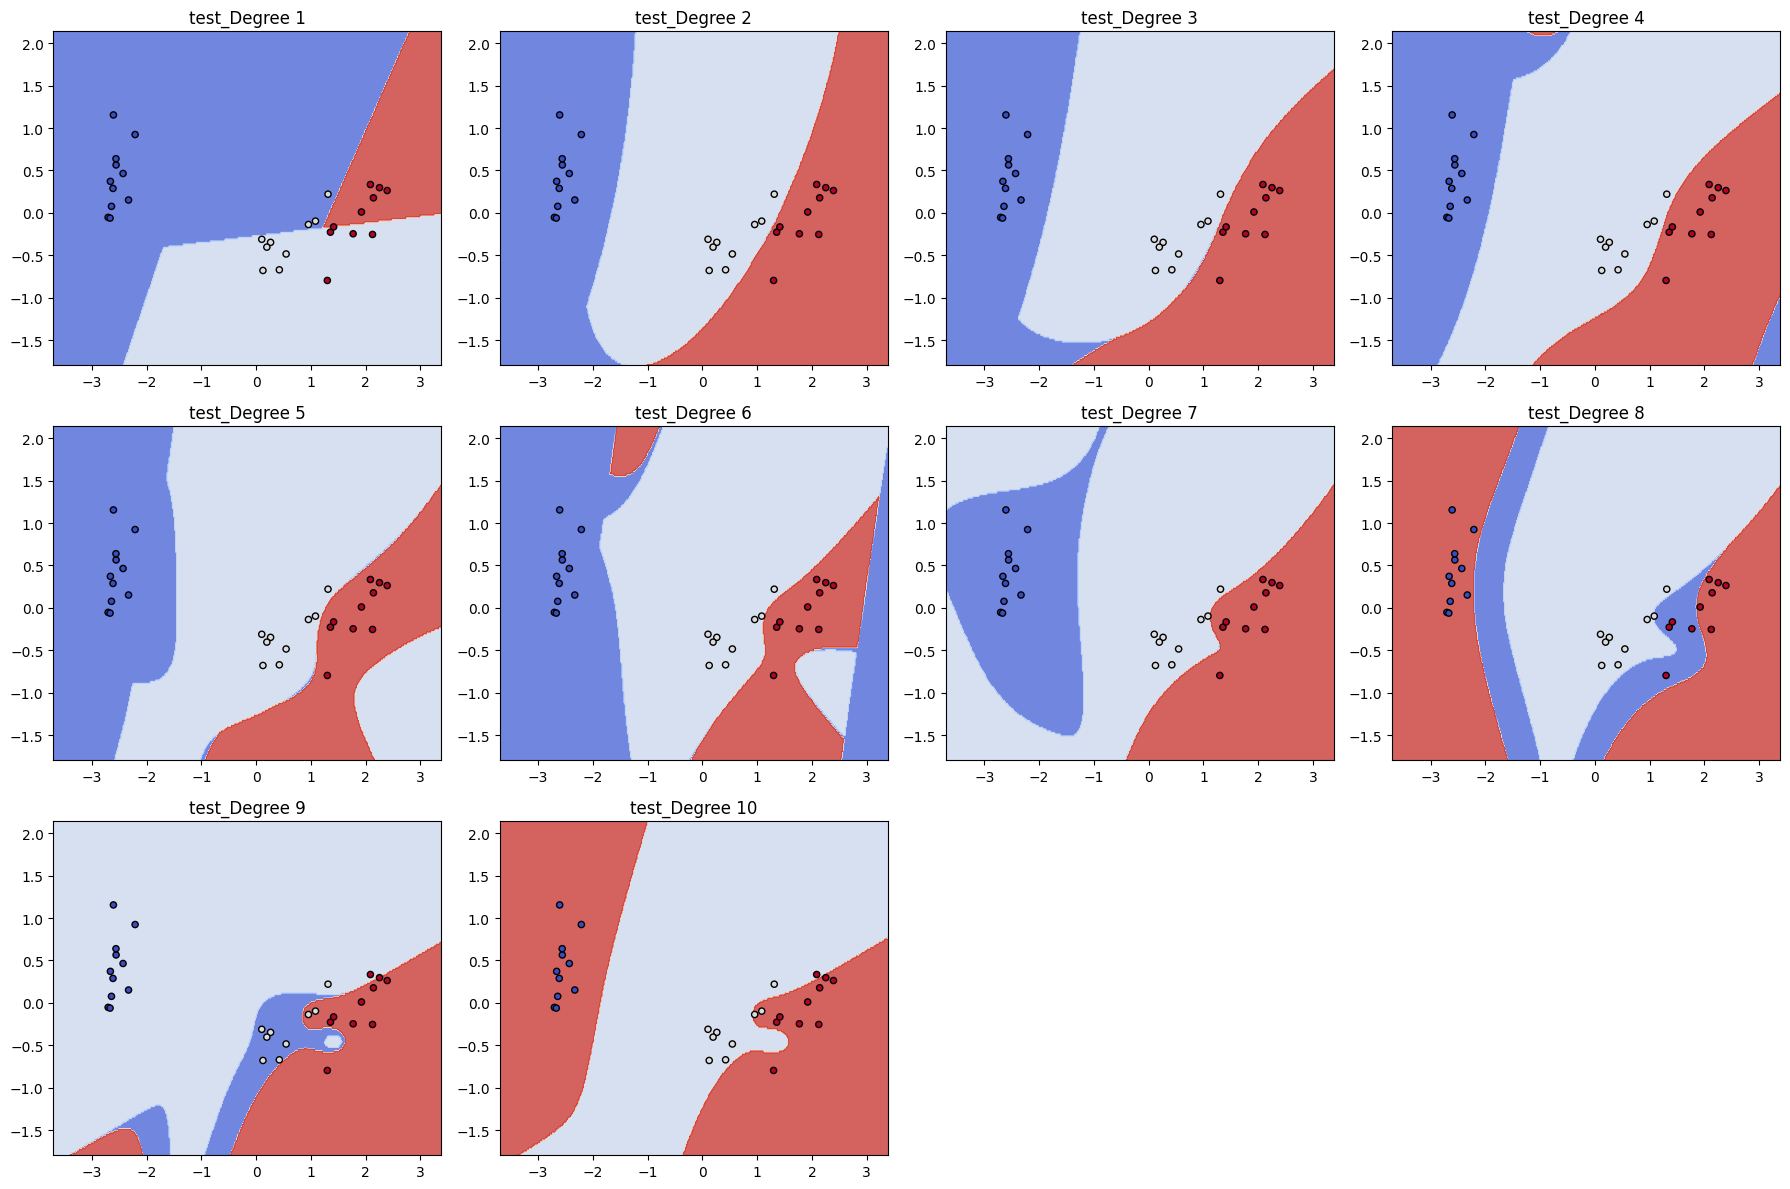

In [36]:
plt.figure(figsize=(18, 12))
x_min, x_max = X_test_pca[:, 0].min() - 1, X_test_pca[:, 0].max() + 1
y_min, y_max = X_test_pca[:, 1].min() - 1, X_test_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

for i, model in enumerate(models):
    plt.subplot(3, 4, i + 1)
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()], kernel_type='polynomial_kernel', poly_params=(1, degrees[i]))
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
    plt.title(f"test_Degree {i + 1}")
    # Plot support vectors for SVC
    if hasattr(model, 'support_vectors_'):
        sv = model.support_vectors_
        plt.scatter(sv[:, 0], sv[:, 1], s=100, linewidth=1, facecolors='none', edgecolors='k')

plt.tight_layout()
plt.show()

In [37]:
images = []
x_min, x_max = X_test_pca[:, 0].min() - 1, X_test_pca[:, 0].max() + 1
y_min, y_max = X_test_pca[:, 1].min() - 1, X_test_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
for i, model in enumerate(models):
    plt.figure(figsize=(6, 4))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()], kernel_type='polynomial_kernel', poly_params=(1, degrees[i]))
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
    plt.title(f"Degree {i + 1}")
    plt.tight_layout()
    # Save each plot as an image
    filename = f'test_degree_{i + 1}.png'
    plt.savefig(filename)
    images.append(imageio.imread(filename))
    plt.close()
# Save images as a GIF
gif_filename = 'q1_d_test.gif'
imageio.mimsave(gif_filename, images, duration=1)
print(f"GIF created: {gif_filename}")

<ipython-input-37-bfd290ddbec3>:16: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


GIF created: q1_d_test.gif
